In [1]:
import geopandas as gpd
import pandas as pd
from shapely import wkt
import folium
from folium.features import GeoJsonTooltip
from folium.plugins import FloatImage
import base64
import requests
from zipfile import ZipFile
from io import BytesIO
import seaborn as sns
import matplotlib.pyplot as plt
import re
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np

In [2]:
#Loading of the dataset
#The windparks
df=pd.read_csv('Offshores_Windparks.csv')


In [3]:
df

,Name,AnzahlWKAs,Leistung(MW),Latitude_cor,Longitude_cor,Status,"Windkraftanlagentyp(Leistung, Rotordurchmesser)",Inbetrieb­nahme(Jahr)
0,alpha ventus,12.0,60.48,54.008333,6.598333,in Betrieb,"6 × REpower 5M(5,08 MW, 126,5 m)6 ×AREVAM5000-...",2010
1,BARD Offshore I,80.0,400.00,54.358333,5.975000,in Betrieb,"BARD5.0(5,0 MW, 122,0 m)",2013
2,Riffgat,30.0,113.40,53.690000,6.480000,in Betrieb,"Siemens SWT-3.6-120(3,78 MW, 120,0 m)",2014
3,Amrumbank West,80.0,302.40,54.500000,7.800000,in Betrieb,"Siemens SWT-3.6-120(3,78 MW, 120,0 m)",2015
4,Borkum Riffgrund 1,78.0,312.00,53.966667,6.550000,in Betrieb,"Siemens SWT-4.0-120(4,0 MW, 120,0 m)",2015
5,Butendiek,80.0,288.00,54.900000,7.750000,in Betrieb,"Siemens SWT-3.6-120(3,6 MW, 120,0 m)",2015
6,DanTysk,80.0,302.40,55.150000,7.175000,in Betrieb,"Siemens SWT-3.6-120(3,78 MW, 120,0 m)",2015
7,Global Tech I,80.0,400.00,54.500000,6.358333,in Betrieb,"AREVA Multibrid M5000-116(5,0 MW, 116,0 m)",2015
8,MeerwindSüd/Ost,80.0,288.00,54.383333,7.683333,in Betrieb,"Siemens SWT-3.6-120(3,6 MW, 120,0 m)",2015
9,Nordsee Ost,48.0,295.20,54.433333,7.683333,in Betrieb,"Senvion6.2M126(6,15 MW, 126,0 m)",2015


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 8 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Name                                             44 non-null     object 
 1   AnzahlWKAs                                       36 non-null     float64
 2   Leistung(MW)                                     44 non-null     float64
 3   Latitude_cor                                     44 non-null     float64
 4   Longitude_cor                                    44 non-null     float64
 5   Status                                           44 non-null     object 
 6   Windkraftanlagentyp(Leistung, Rotordurchmesser)  37 non-null     object 
 7   Inbetrieb­nahme(Jahr)                            44 non-null     object 
dtypes: float64(4), object(4)
memory usage: 2.9+ KB


In [5]:
# Define the mapping for NUTS codes to Bundesländer
date_correcting = {
    '(2025)': '2025','(2030)':'2030','(2027)':'2027',
    '(2024)': '2024', '(2028)':'2028' ,
    '2023[26]': '2023', '(2026)':'2026'}

# Apply the mapping to the 'NUTS 1.1' column
df['Inbetrieb­nahme(Jahr)'] = df['Inbetrieb­nahme(Jahr)'].replace(date_correcting)

In [6]:

# Convert 'Age' column to integers, replacing non-numeric with NaN
df['Anfangjahr'] = pd.to_numeric(df['Inbetrieb­nahme(Jahr)'], errors='coerce')
df

,Name,AnzahlWKAs,Leistung(MW),Latitude_cor,Longitude_cor,Status,"Windkraftanlagentyp(Leistung, Rotordurchmesser)",Inbetrieb­nahme(Jahr),Anfangjahr
0,alpha ventus,12.0,60.48,54.008333,6.598333,in Betrieb,"6 × REpower 5M(5,08 MW, 126,5 m)6 ×AREVAM5000-...",2010,2010
1,BARD Offshore I,80.0,400.00,54.358333,5.975000,in Betrieb,"BARD5.0(5,0 MW, 122,0 m)",2013,2013
2,Riffgat,30.0,113.40,53.690000,6.480000,in Betrieb,"Siemens SWT-3.6-120(3,78 MW, 120,0 m)",2014,2014
3,Amrumbank West,80.0,302.40,54.500000,7.800000,in Betrieb,"Siemens SWT-3.6-120(3,78 MW, 120,0 m)",2015,2015
4,Borkum Riffgrund 1,78.0,312.00,53.966667,6.550000,in Betrieb,"Siemens SWT-4.0-120(4,0 MW, 120,0 m)",2015,2015
5,Butendiek,80.0,288.00,54.900000,7.750000,in Betrieb,"Siemens SWT-3.6-120(3,6 MW, 120,0 m)",2015,2015
6,DanTysk,80.0,302.40,55.150000,7.175000,in Betrieb,"Siemens SWT-3.6-120(3,78 MW, 120,0 m)",2015,2015
7,Global Tech I,80.0,400.00,54.500000,6.358333,in Betrieb,"AREVA Multibrid M5000-116(5,0 MW, 116,0 m)",2015,2015
8,MeerwindSüd/Ost,80.0,288.00,54.383333,7.683333,in Betrieb,"Siemens SWT-3.6-120(3,6 MW, 120,0 m)",2015,2015
9,Nordsee Ost,48.0,295.20,54.433333,7.683333,in Betrieb,"Senvion6.2M126(6,15 MW, 126,0 m)",2015,2015


In [7]:
# Duplicate row 0 and insert it at the top
df = pd.concat([df.iloc[[0]], df], ignore_index=True)


# Display the updated DataFrame
print(df)

                                         Name  AnzahlWKAs  Leistung(MW)  \
0                                alpha ventus        12.0         60.48   
1                                alpha ventus        12.0         60.48   
2                             BARD Offshore I        80.0        400.00   
3                                     Riffgat        30.0        113.40   
4                              Amrumbank West        80.0        302.40   
5                          Borkum Riffgrund 1        78.0        312.00   
6                                   Butendiek        80.0        288.00   
7                                     DanTysk        80.0        302.40   
8                               Global Tech I        80.0        400.00   
9                             MeerwindSüd/Ost        80.0        288.00   
10                                Nordsee Ost        48.0        295.20   
11           Trianel Windpark Borkum(Phase 1)        40.0        200.00   
12                       

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 9 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Name                                             45 non-null     object 
 1   AnzahlWKAs                                       37 non-null     float64
 2   Leistung(MW)                                     45 non-null     float64
 3   Latitude_cor                                     45 non-null     float64
 4   Longitude_cor                                    45 non-null     float64
 5   Status                                           45 non-null     object 
 6   Windkraftanlagentyp(Leistung, Rotordurchmesser)  38 non-null     object 
 7   Inbetrieb­nahme(Jahr)                            45 non-null     object 
 8   Anfangjahr                                       45 non-null     int64  
dtypes: float64(4), int64(1), object(4)


In [9]:
df.loc[0, 'AnzahlWKAs'] = 6
df.loc[0, 'Windkraftanlagentyp(Leistung, Rotordurchmesser)'] = 'REpower 5M (5,08 MW, 126,5 m)'
df.loc[1, 'AnzahlWKAs'] = 6
df.loc[1, 'Windkraftanlagentyp(Leistung, Rotordurchmesser)'] = 'AREVA Multibrid M5000-116(5,0 MW, 116,0 m)'
df.loc[0, 'Leistung(MW)'] = 30.24
df.loc[1, 'Leistung(MW)'] = 30.24


df

,Name,AnzahlWKAs,Leistung(MW),Latitude_cor,Longitude_cor,Status,"Windkraftanlagentyp(Leistung, Rotordurchmesser)",Inbetrieb­nahme(Jahr),Anfangjahr
0,alpha ventus,6.0,30.24,54.008333,6.598333,in Betrieb,"REpower 5M (5,08 MW, 126,5 m)",2010,2010
1,alpha ventus,6.0,30.24,54.008333,6.598333,in Betrieb,"AREVA Multibrid M5000-116(5,0 MW, 116,0 m)",2010,2010
2,BARD Offshore I,80.0,400.00,54.358333,5.975000,in Betrieb,"BARD5.0(5,0 MW, 122,0 m)",2013,2013
3,Riffgat,30.0,113.40,53.690000,6.480000,in Betrieb,"Siemens SWT-3.6-120(3,78 MW, 120,0 m)",2014,2014
4,Amrumbank West,80.0,302.40,54.500000,7.800000,in Betrieb,"Siemens SWT-3.6-120(3,78 MW, 120,0 m)",2015,2015
5,Borkum Riffgrund 1,78.0,312.00,53.966667,6.550000,in Betrieb,"Siemens SWT-4.0-120(4,0 MW, 120,0 m)",2015,2015
6,Butendiek,80.0,288.00,54.900000,7.750000,in Betrieb,"Siemens SWT-3.6-120(3,6 MW, 120,0 m)",2015,2015
7,DanTysk,80.0,302.40,55.150000,7.175000,in Betrieb,"Siemens SWT-3.6-120(3,78 MW, 120,0 m)",2015,2015
8,Global Tech I,80.0,400.00,54.500000,6.358333,in Betrieb,"AREVA Multibrid M5000-116(5,0 MW, 116,0 m)",2015,2015
9,MeerwindSüd/Ost,80.0,288.00,54.383333,7.683333,in Betrieb,"Siemens SWT-3.6-120(3,6 MW, 120,0 m)",2015,2015


In [10]:
df['Status'].unique()

array(['in Betrieb', 'in Teilbetrieb', 'in Bau', 'in Planung'],
      dtype=object)

In [11]:
df['Location'] = df['Longitude_cor'].apply(lambda x: 'Ostsee' if x > 10 else 'Nordsee')


In [12]:
manufacturer_mapping=({
    'REPower': 'Senvion',
    'Senvion': 'Senvion',
    'AREVA': 'AREVA',
    'GE': 'GE',
    'BARD': 'BARD',
    'Adwen': 'Adwen',
    "Vestas": "Vestas",
    "Siemens Gamesa": "Siemens Gamesa",
    "Mingyang": "Mingyang",
    "Gamesa": "Siemens Gamesa", 
    'SWT':'Siemens',
    

   })

# Function to extract manufacturer with error handling for None/NaN
def extract_manufacturer(turbine_type):
    if pd.isnull(turbine_type):  # Check if value is None or NaN
        return None
    for key, manufacturer in manufacturer_mapping.items():
        if key.lower() in turbine_type.lower():
            return manufacturer
    return None  # Return None if no match is found

# Apply function to create a new column
df['Manufacturer'] = df['Windkraftanlagentyp(Leistung, Rotordurchmesser)'].apply(extract_manufacturer)

# Display the updated DataFrame
print(df)

                                         Name  AnzahlWKAs  Leistung(MW)  \
0                                alpha ventus         6.0         30.24   
1                                alpha ventus         6.0         30.24   
2                             BARD Offshore I        80.0        400.00   
3                                     Riffgat        30.0        113.40   
4                              Amrumbank West        80.0        302.40   
5                          Borkum Riffgrund 1        78.0        312.00   
6                                   Butendiek        80.0        288.00   
7                                     DanTysk        80.0        302.40   
8                               Global Tech I        80.0        400.00   
9                             MeerwindSüd/Ost        80.0        288.00   
10                                Nordsee Ost        48.0        295.20   
11           Trianel Windpark Borkum(Phase 1)        40.0        200.00   
12                       

In [13]:
df['Windkraftanlagentyp(Leistung, Rotordurchmesser)'].unique()

array(['REpower 5M (5,08 MW, 126,5 m)',
       'AREVA Multibrid M5000-116(5,0 MW, 116,0 m)',
       'BARD5.0(5,0 MW, 122,0 m)',
       'Siemens SWT-3.6-120(3,78 MW, 120,0 m)',
       'Siemens SWT-4.0-120(4,0 MW, 120,0 m)',
       'Siemens SWT-3.6-120(3,6 MW, 120,0 m)',
       'Senvion6.2M126(6,15 MW, 126,0 m)',
       'Siemens SWT-6.0-154(6,3 MW, 154,0 m)',
       'Senvion 6.2M126(6,15 MW, 126,0 m)',
       'Siemens SWT-4.0-130(4,0 MW, 130,0 m)',
       'Siemens SWT-6.0-154(6,0 MW, 154,0 m)',
       'MHI Vestas V164-8.0 MW(8,3 MW, 164,0 m)',
       'MHI Vestas V164-8.0 MW(8,4 MW, 164,0 m)',
       'GE Haliade 150-6 MW(6,0 MW, 151,0 m)',
       'Siemens SWT-7.0-154(7,35 MW, 154,0 m)',
       'Senvion 6.3M152(6,33 MW, 152,0 m)',
       'Siemens Gamesa SG 8.0-167 DD(9,0 MW, 167,0 m)',
       'Siemens Gamesa SG 11.0-200 DD(11,0 MW, 200,0 m)',
       'MHI-Vestas V236-15.0MW(15,0 MW, 236,0 m)',
       'Vestas V236-15.0 MW(15,0 MW, 236,0 m)', nan,
       'Mingyang(18,5 MW, 260m)[1]', 'Siemens

In [14]:
in_betrieb=df.loc[(df['Status']=='in Betrieb')|(df['Status']=='in Teilbetrieb') ]

In [15]:
in_betrieb['Windkraftanlagentyp(Leistung, Rotordurchmesser)'].unique()

array(['REpower 5M (5,08 MW, 126,5 m)',
       'AREVA Multibrid M5000-116(5,0 MW, 116,0 m)',
       'BARD5.0(5,0 MW, 122,0 m)',
       'Siemens SWT-3.6-120(3,78 MW, 120,0 m)',
       'Siemens SWT-4.0-120(4,0 MW, 120,0 m)',
       'Siemens SWT-3.6-120(3,6 MW, 120,0 m)',
       'Senvion6.2M126(6,15 MW, 126,0 m)',
       'Siemens SWT-6.0-154(6,3 MW, 154,0 m)',
       'Senvion 6.2M126(6,15 MW, 126,0 m)',
       'Siemens SWT-4.0-130(4,0 MW, 130,0 m)',
       'Siemens SWT-6.0-154(6,0 MW, 154,0 m)',
       'MHI Vestas V164-8.0 MW(8,3 MW, 164,0 m)',
       'MHI Vestas V164-8.0 MW(8,4 MW, 164,0 m)',
       'GE Haliade 150-6 MW(6,0 MW, 151,0 m)',
       'Siemens SWT-7.0-154(7,35 MW, 154,0 m)',
       'Senvion 6.3M152(6,33 MW, 152,0 m)',
       'Siemens Gamesa SG 8.0-167 DD(9,0 MW, 167,0 m)',
       'Siemens Gamesa SG 11.0-200 DD(11,0 MW, 200,0 m)',
       'Siemens SWT-2.3-93(2,3 MW, 93,0 m)',
       'AdwenAD 5-135(5,05 MW, 135,0 m)',
       'Siemens SWT-6.0-154(6,4 MW, 154,0 m)',
       'MHI Ves

In [16]:
in_betrieb

,Name,AnzahlWKAs,Leistung(MW),Latitude_cor,Longitude_cor,Status,"Windkraftanlagentyp(Leistung, Rotordurchmesser)",Inbetrieb­nahme(Jahr),Anfangjahr,Location,Manufacturer
0,alpha ventus,6.0,30.24,54.008333,6.598333,in Betrieb,"REpower 5M (5,08 MW, 126,5 m)",2010,2010,Nordsee,Senvion
1,alpha ventus,6.0,30.24,54.008333,6.598333,in Betrieb,"AREVA Multibrid M5000-116(5,0 MW, 116,0 m)",2010,2010,Nordsee,AREVA
2,BARD Offshore I,80.0,400.00,54.358333,5.975000,in Betrieb,"BARD5.0(5,0 MW, 122,0 m)",2013,2013,Nordsee,BARD
3,Riffgat,30.0,113.40,53.690000,6.480000,in Betrieb,"Siemens SWT-3.6-120(3,78 MW, 120,0 m)",2014,2014,Nordsee,Siemens
4,Amrumbank West,80.0,302.40,54.500000,7.800000,in Betrieb,"Siemens SWT-3.6-120(3,78 MW, 120,0 m)",2015,2015,Nordsee,Siemens
5,Borkum Riffgrund 1,78.0,312.00,53.966667,6.550000,in Betrieb,"Siemens SWT-4.0-120(4,0 MW, 120,0 m)",2015,2015,Nordsee,Siemens
6,Butendiek,80.0,288.00,54.900000,7.750000,in Betrieb,"Siemens SWT-3.6-120(3,6 MW, 120,0 m)",2015,2015,Nordsee,Siemens
7,DanTysk,80.0,302.40,55.150000,7.175000,in Betrieb,"Siemens SWT-3.6-120(3,78 MW, 120,0 m)",2015,2015,Nordsee,Siemens
8,Global Tech I,80.0,400.00,54.500000,6.358333,in Betrieb,"AREVA Multibrid M5000-116(5,0 MW, 116,0 m)",2015,2015,Nordsee,AREVA
9,MeerwindSüd/Ost,80.0,288.00,54.383333,7.683333,in Betrieb,"Siemens SWT-3.6-120(3,6 MW, 120,0 m)",2015,2015,Nordsee,Siemens


In [17]:
# Total counts for each type grouped by year and type
type_totals = (
    in_betrieb.groupby(['Windkraftanlagentyp(Leistung, Rotordurchmesser)', 'Anfangjahr'])['AnzahlWKAs']
    .sum()
    .reset_index()  # Reset index to sort by multiple columns
    .sort_values(by=['AnzahlWKAs', 'Anfangjahr'], ascending=[False, True])  # Sort by year ascending, count descending
)
type_totals

,"Windkraftanlagentyp(Leistung, Rotordurchmesser)",Anfangjahr,AnzahlWKAs
15,"Siemens SWT-3.6-120(3,6 MW, 120,0 m)",2015,240.0
17,"Siemens SWT-3.6-120(3,78 MW, 120,0 m)",2015,160.0
1,"AREVA Multibrid M5000-116(5,0 MW, 116,0 m)",2015,120.0
21,"Siemens SWT-6.0-154(6,3 MW, 154,0 m)",2017,97.0
3,"BARD5.0(5,0 MW, 122,0 m)",2013,80.0
18,"Siemens SWT-4.0-120(4,0 MW, 120,0 m)",2015,78.0
9,"Senvion 6.2M126(6,15 MW, 126,0 m)",2017,72.0
19,"Siemens SWT-4.0-130(4,0 MW, 130,0 m)",2017,72.0
23,"Siemens SWT-7.0-154(7,35 MW, 154,0 m)",2019,71.0
2,"AdwenAD 5-135(5,05 MW, 135,0 m)",2017,70.0


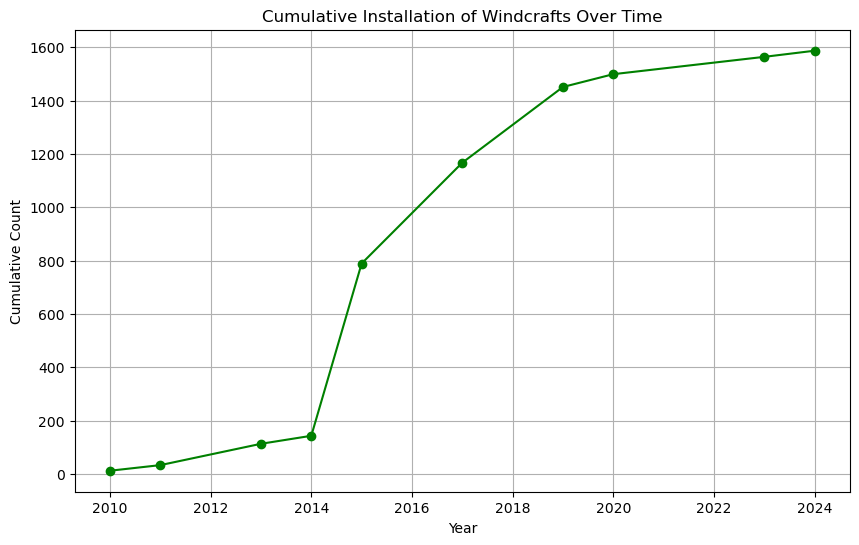

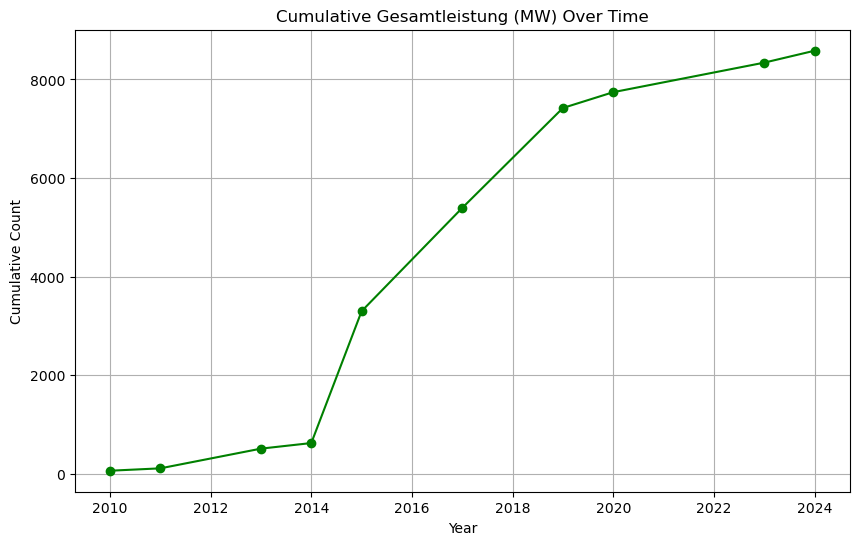

In [18]:
# Group by year and calculate cumulative sum
cumulative_data = in_betrieb.groupby('Anfangjahr')['AnzahlWKAs'].sum().cumsum()

# Plot
plt.figure(figsize=(10, 6))
cumulative_data.plot(kind='line', color='green', marker='o')
plt.title('Cumulative Installation of Windcrafts Over Time')
plt.xlabel('Year')
plt.ylabel('Cumulative Count')
plt.grid(True)
plt.show()

# Group by year and calculate cumulative sum
cumulative_data = in_betrieb.groupby('Anfangjahr')['Leistung(MW)'].sum().cumsum()

# Plot
plt.figure(figsize=(10, 6))
cumulative_data.plot(kind='line', color='green', marker='o')
plt.title('Cumulative Gesamtleistung (MW) Over Time')
plt.xlabel('Year')
plt.ylabel('Cumulative Count')
plt.grid(True)
plt.show()


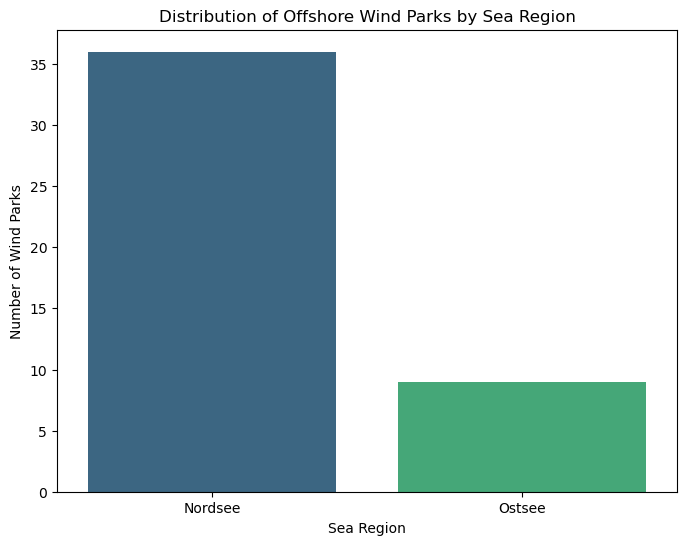

In [19]:
# Count the number of wind parks in each sea region
location_counts = df['Location'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')
plt.title('Distribution of Offshore Wind Parks by Sea Region')
plt.xlabel('Sea Region')
plt.ylabel('Number of Wind Parks')
plt.show()

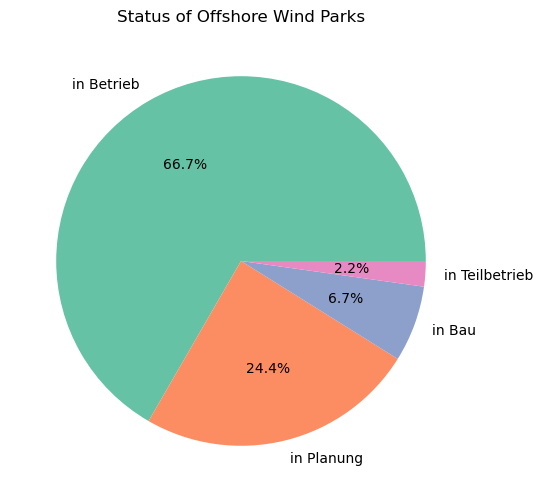

In [20]:
status_counts = df['Status'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2", len(status_counts)))
plt.title('Status of Offshore Wind Parks')
plt.show()

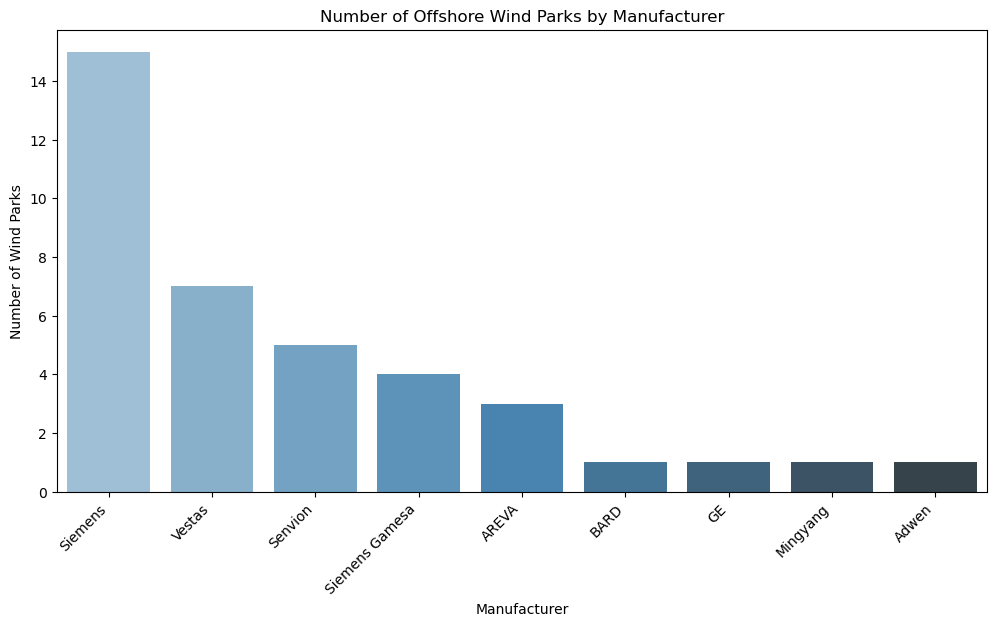

In [21]:
# Count the number of wind parks by manufacturer
manufacturer_counts = df['Manufacturer'].value_counts()

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=manufacturer_counts.index, y=manufacturer_counts.values, palette='Blues_d')
plt.title('Number of Offshore Wind Parks by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Wind Parks')
plt.xticks(rotation=45, ha='right')
plt.show()

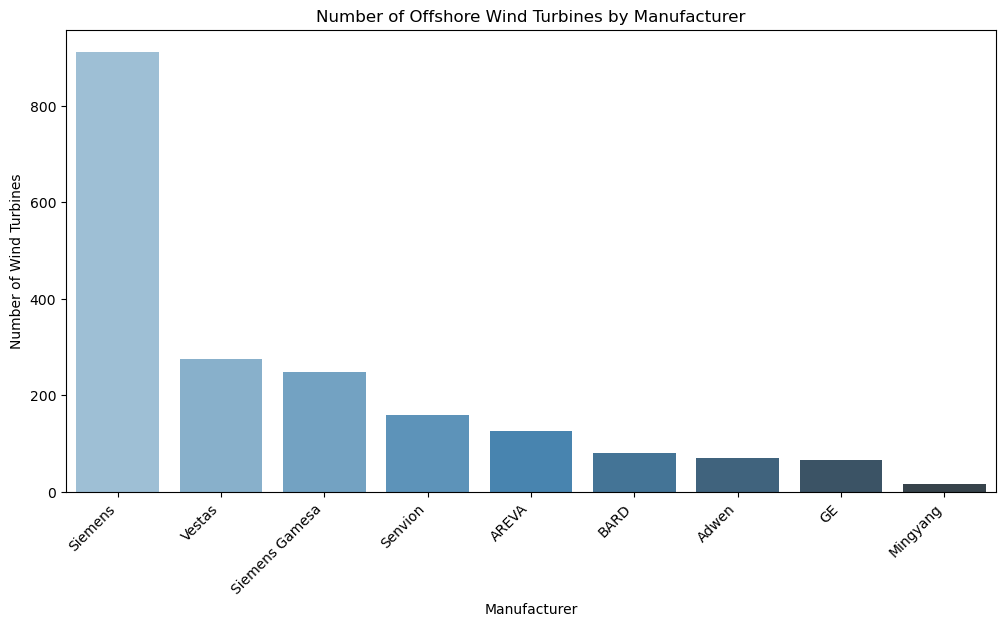

In [22]:

# Calculate the sum of turbines (Anzahl(WKA)) per manufacturer
total_turbines_by_manufacturer = df.groupby('Manufacturer')['AnzahlWKAs'].sum().sort_values(ascending=False)

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=total_turbines_by_manufacturer.index, y=total_turbines_by_manufacturer.values, palette='Blues_d')
plt.title('Number of Offshore Wind Turbines by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Wind Turbines')
plt.xticks(rotation=45, ha='right')
plt.show()


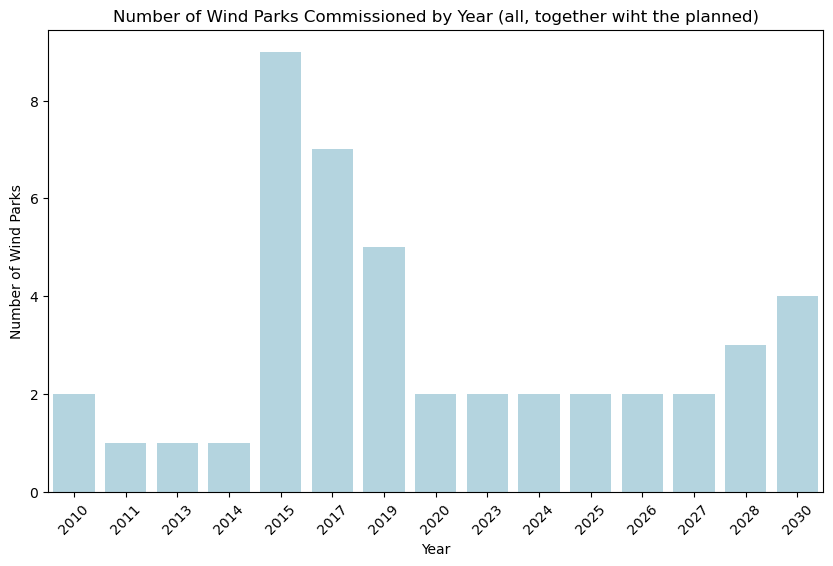

In [23]:
# Count the number of wind parks per year
year_counts = df['Anfangjahr'].value_counts().sort_index()

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, color='lightblue')
plt.title('Number of Wind Parks Commissioned by Year (all, together wiht the planned)')
plt.xlabel('Year')
plt.ylabel('Number of Wind Parks')
plt.xticks(rotation=45)
plt.show()

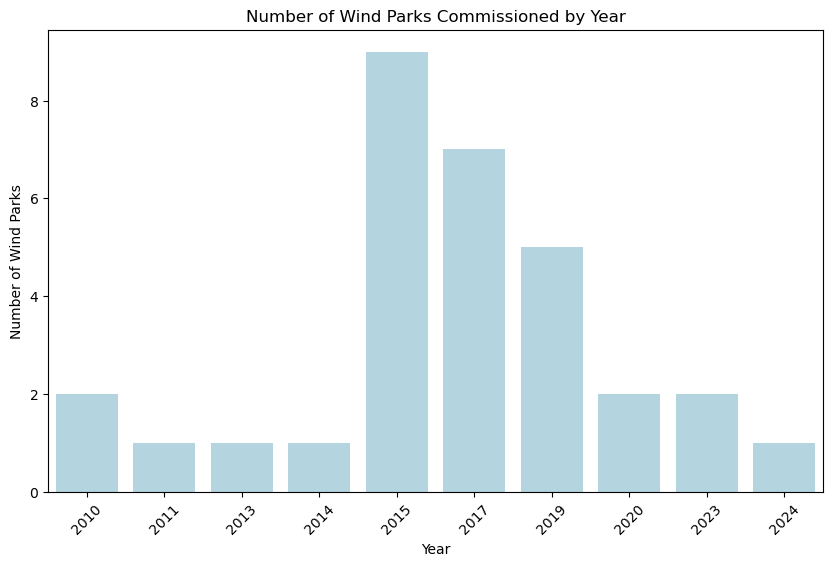

In [24]:
# Count the number of wind parks per year
year_counts = in_betrieb['Anfangjahr'].value_counts().sort_index()

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, color='lightblue')
plt.title('Number of Wind Parks Commissioned by Year')
plt.xlabel('Year')
plt.ylabel('Number of Wind Parks')
plt.xticks(rotation=45)
plt.show()

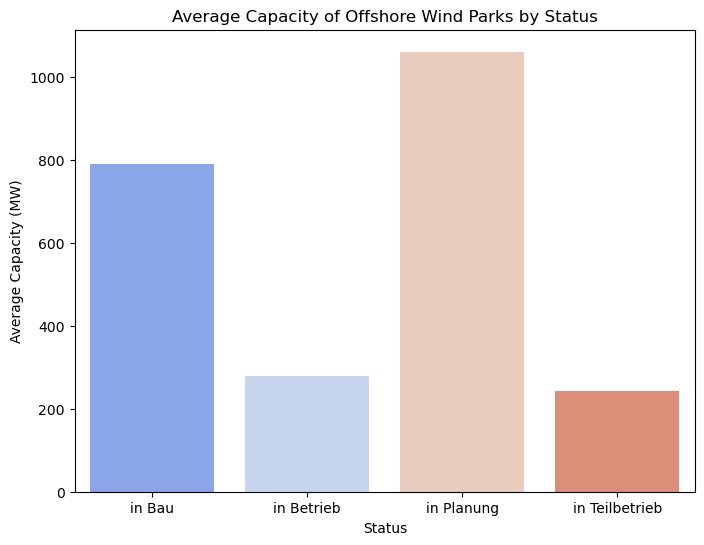

In [25]:

# Group by status and calculate the mean capacity
avg_capacity_by_status = df.groupby('Status')['Leistung(MW)'].mean()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_capacity_by_status.index, y=avg_capacity_by_status.values, palette='coolwarm')
plt.title('Average Capacity of Offshore Wind Parks by Status')
plt.xlabel('Status')
plt.ylabel('Average Capacity (MW)')
plt.show()

In [26]:
df.to_csv('offshores_windparks.csv', index=False)